In [2]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

In [3]:
from IPython.display import Image, display

In [4]:
parser = load_parser()

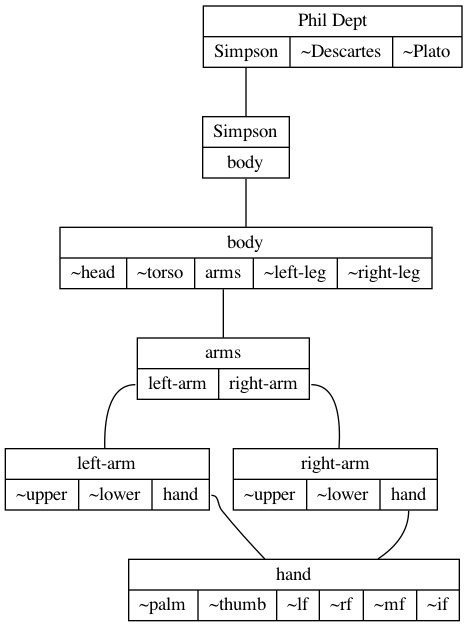

In [5]:
simpson_hn = Hypernetwork()

compile_hn(simpson_hn, parser, """
    body=<~head, ~torso, arms=<left-arm, right-arm>, ~left-leg, ~right-leg; B(body)>
    left-arm=<~upper, ~lower, hand; B(body)>
#    left-leg=<~thigh, ~shin, foot; B(body)>
    right-arm=<~upper, ~lower, hand; B(body)>
#    right-leg=<~thigh, ~shin, ~foot; B(body)>
    hand=<~palm, ~thumb, ~lf, ~rf, ~mf, ~if; B(body)>
    
    PhilDept=<Simpson, ~Descartes, ~Plato; B(uni-depts)>
    
    Simpson=<body>
""")

draw_hn(simpson_hn, fname="/tmp/simpson", view=False)
Image(filename='/tmp/simpson.png', width=400, height=400)